In [5]:
import numpy as np
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [6]:
u = 'https://www.automl.org/automl/literature-on-neural-architecture-search/'
resp = urllib.request.urlopen(u)
soup = BeautifulSoup(resp, from_encoding=resp.info().get_param('charset'))

all_papers = []
paper_tags = ['ieee', 'arxiv', 'archives', 'nature', 'worldscientific', 'nips', 'proceedings']
for link in soup.find_all('a', href=True):
    is_paper = [p in link['href'] for p in paper_tags]
    is_paper = np.array(is_paper).any()
    if is_paper:
        all_papers.append(link['href'])
#     else:
#         print(link['href'])

In [7]:
no_date = []
all_dates = []
for paper in all_papers:
    try:
        resp = urllib.request.urlopen(paper)
        soup = BeautifulSoup(resp, from_encoding=resp.info().get_param('charset'))

        metas = soup.find_all('meta')
        date = [ meta.attrs['content'] for meta in metas if 'name' in meta.attrs and meta.attrs['name'] == 'citation_date' ]
        if date != []:
            all_dates.append(date)
        else:
            no_date.append(paper)
    except Exception as ex:
        print(ex, paper)
    

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


HTTP Error 403: Forbidden https://www.worldscientific.com/doi/abs/10.1142/S1469026818500086


In [8]:
int_dates = []
for d in all_dates:
    if d != []:
        int_dates.append(int(d[0][:4]))

In [9]:
series = pd.Series(int_dates)
val_counts = series.value_counts()

In [10]:
dates = [2015, 2016, 2017, 2018, 2019]
keys = val_counts.keys()
vals = val_counts.values

<BarContainer object of 5 artists>

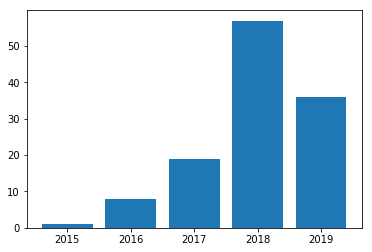

In [11]:
plot_idx = []
for d in dates:
    plot_idx.append(np.argmax(d == keys))
plt.bar(dates, vals[np.array(plot_idx)])

In [12]:
no_date

['https://ieeexplore.ieee.org/document/8681706',
 'https://ieeexplore.ieee.org/document/8676019',
 'https://hal.archives-ouvertes.fr/hal-02068293/document',
 'https://www.nature.com/articles/s42256-018-0006-z',
 'http://papers.nips.cc/paper/8056-transfer-learning-with-neural-automl.pdf',
 'https://ieeexplore.ieee.org/document/8533601',
 'https://ieeexplore.ieee.org/document/8451394',
 'http://proceedings.mlr.press/v80/bender18a/bender18a.pdf',
 'http://proceedings.mlr.press/v64/mendoza_towards_2016.html',
 'https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf',
 'https://ieeexplore.ieee.org/document/6792316/',
 'https://ieeexplore.ieee.org/document/784219/',
 'https://ieeexplore.ieee.org/document/265960/',
 'https://papers.nips.cc/paper/207-the-cascade-correlation-learning-architecture',
 'https://papers.nips.cc/paper/149-self-organizing-neural-networks-for-the-identification-problem',
 'http://proceedings.mlr.press/v54/klein17a.html']